In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [8]:
from fastai import *
from fastai.vision import *

In [9]:
bs = 64

In [10]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True)
    Download `url` if it doesn't exist to `fname` and un-tgz to folder `dest`



In [11]:
doc(untar_data)

In [12]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [17]:
path = untar_data(URLs.PETS); path

PosixPath('/Users/mariusbutuc/.fastai/data/oxford-iiit-pet')

In [21]:
path.ls()

[PosixPath('/Users/mariusbutuc/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/Users/mariusbutuc/.fastai/data/oxford-iiit-pet/annotations')]

In [15]:
import fastai

In [16]:
print(fastai.__version__)

1.0.21


In [18]:
path_anno = path/'annotations'

In [19]:
path_img = path/'images'

In [20]:
path_anno

PosixPath('/Users/mariusbutuc/.fastai/data/oxford-iiit-pet/annotations')

In [22]:
fnames = get_image_files(path_img)

In [23]:
type(fnames)

list

In [24]:
fnames[:5]

[PosixPath('/Users/mariusbutuc/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),
 PosixPath('/Users/mariusbutuc/.fastai/data/oxford-iiit-pet/images/pug_52.jpg'),
 PosixPath('/Users/mariusbutuc/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg'),
 PosixPath('/Users/mariusbutuc/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg'),
 PosixPath('/Users/mariusbutuc/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg')]

In [25]:
pat = r'/([^/]+)_\d+.jpg$'

In [26]:
re.search(pat, '/Users/mariusbutuc/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg')

<re.Match object; span=(54, 75), match='/Egyptian_Mau_167.jpg'>

In [32]:
np.random.seed(17)

? What is get_transforms

In [33]:
data = ImageDataBunch.from_name_re(
    path_img, 
    fnames, 
    pat, 
    ds_tfms=get_transforms(), 
    size=224, 
    bs=bs
).normalize(imagenet_stats)

In [30]:
imagenet_stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

ValueError: padding_mode needs to be 'zeros' or 'border', but got reflection

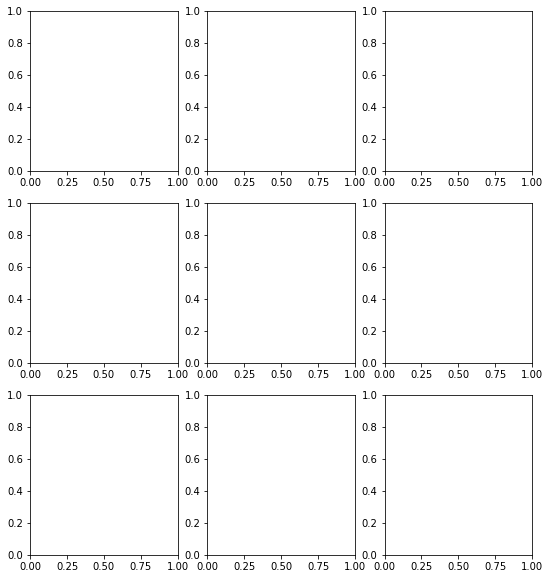

In [44]:
data.show_batch(3)

In [36]:
print(data.classes)

['Egyptian_Mau', 'pug', 'basset_hound', 'Siamese', 'shiba_inu', 'Birman', 'leonberger', 'saint_bernard', 'Abyssinian', 'miniature_pinscher', 'wheaten_terrier', 'scottish_terrier', 'pomeranian', 'german_shorthaired', 'english_setter', 'newfoundland', 'Sphynx', 'British_Shorthair', 'Bombay', 'boxer', 'great_pyrenees', 'samoyed', 'Russian_Blue', 'Persian', 'japanese_chin', 'Ragdoll', 'english_cocker_spaniel', 'Maine_Coon', 'havanese', 'Bengal', 'american_pit_bull_terrier', 'keeshond', 'american_bulldog', 'chihuahua', 'beagle', 'yorkshire_terrier', 'staffordshire_bull_terrier']


In [37]:
data.c

37

In [42]:
learn = create_cnn(
    data, 
    models.resnet34,
    metrics=error_rate
)

In [43]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate


ValueError: Traceback (most recent call last):
  File "/Users/mariusbutuc/.asdf/installs/python/anaconda3-5.3.0/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 106, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/Users/mariusbutuc/.asdf/installs/python/anaconda3-5.3.0/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 106, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/Users/mariusbutuc/.asdf/installs/python/anaconda3-5.3.0/lib/python3.7/site-packages/fastai/vision/data.py", line 234, in __getitem__
    x = apply_tfms(self.tfms, x, **self.kwargs)
  File "/Users/mariusbutuc/.asdf/installs/python/anaconda3-5.3.0/lib/python3.7/site-packages/fastai/vision/image.py", line 595, in apply_tfms
    else: x = tfm(x)
  File "/Users/mariusbutuc/.asdf/installs/python/anaconda3-5.3.0/lib/python3.7/site-packages/fastai/vision/image.py", line 496, in __call__
    return self.tfm(x, *args, **{**self.resolved, **kwargs}) if self.do_run else x
  File "/Users/mariusbutuc/.asdf/installs/python/anaconda3-5.3.0/lib/python3.7/site-packages/fastai/vision/image.py", line 441, in __call__
    if args: return self.calc(*args, **kwargs)
  File "/Users/mariusbutuc/.asdf/installs/python/anaconda3-5.3.0/lib/python3.7/site-packages/fastai/vision/image.py", line 446, in calc
    if self._wrap: return getattr(x, self._wrap)(self.func, *args, **kwargs)
  File "/Users/mariusbutuc/.asdf/installs/python/anaconda3-5.3.0/lib/python3.7/site-packages/fastai/vision/image.py", line 161, in lighting
    self.logit_px = func(self.logit_px, *args, **kwargs)
  File "/Users/mariusbutuc/.asdf/installs/python/anaconda3-5.3.0/lib/python3.7/site-packages/fastai/vision/image.py", line 199, in logit_px
    if self._logit_px is None: self._logit_px = logit_(self.px)
  File "/Users/mariusbutuc/.asdf/installs/python/anaconda3-5.3.0/lib/python3.7/site-packages/fastai/vision/image.py", line 139, in px
    self.refresh()
  File "/Users/mariusbutuc/.asdf/installs/python/anaconda3-5.3.0/lib/python3.7/site-packages/fastai/vision/image.py", line 126, in refresh
    self._px = _grid_sample(self._px, self.flow, **self.sample_kwargs)
  File "/Users/mariusbutuc/.asdf/installs/python/anaconda3-5.3.0/lib/python3.7/site-packages/fastai/vision/image.py", line 505, in _grid_sample
    return F.grid_sample(x[None], coords, mode=mode, padding_mode=padding_mode)[0]
  File "/Users/mariusbutuc/.asdf/installs/python/anaconda3-5.3.0/lib/python3.7/site-packages/torch/nn/functional.py", line 2092, in grid_sample
    raise ValueError("padding_mode needs to be 'zeros' or 'border', but got {}".format(padding_mode))
ValueError: padding_mode needs to be 'zeros' or 'border', but got reflection


In [45]:
learn.save('lesson-empty-1')